# Introduction to Linear Regression

*Notebook credit: https://github.com/justmarkham/DAT4*

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dimension reduction|clustering|

## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

import seaborn as sns

import statsmodels.formula.api as smf

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [35]:
# read data into a DataFrame
data = pd.read_csv('./data/RRCA_baseflow.csv')

for key in data.keys():
    data[key] = data[key].astype(float)
    if key != 'Observed':
        data[key +'_stand'] = (data[key] - data[key].mean())/data[key].std()

data.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Date_stand,Segment_id_stand,x_stand,y_stand,Evapotranspiration_stand,Precipitation_stand,Irrigation_pumping_stand
0,710732.0,144.0,1086190.0,14476800.0,0.59,18.99,0.0,0.145161,-1.347816,0.329802,-0.2846,-1.126634,-0.662247,0.387574,0.331399
1,710763.0,144.0,1086190.0,14476800.0,0.97,29.63,0.0,0.445161,-1.342885,0.329802,-0.2846,-1.126634,-0.542268,1.399663,0.331399
2,710791.0,144.0,1086190.0,14476800.0,1.34,29.63,0.0,1.332203,-1.338432,0.329802,-0.2846,-1.126634,-0.425447,1.399663,0.331399
3,710822.0,144.0,1086190.0,14476800.0,1.79,29.63,0.0,2.932203,-1.333501,0.329802,-0.2846,-1.126634,-0.283367,1.399663,0.331399
4,710852.0,144.0,1086190.0,14476800.0,8.23,29.63,0.0,3.728689,-1.328730,0.329802,-0.2846,-1.126634,1.749952,1.399663,0.331399


In [5]:
# print the shape of the DataFrame
data.shape

(15591, 8)

There are 200 **observations**, and thus 200 markets in the dataset.

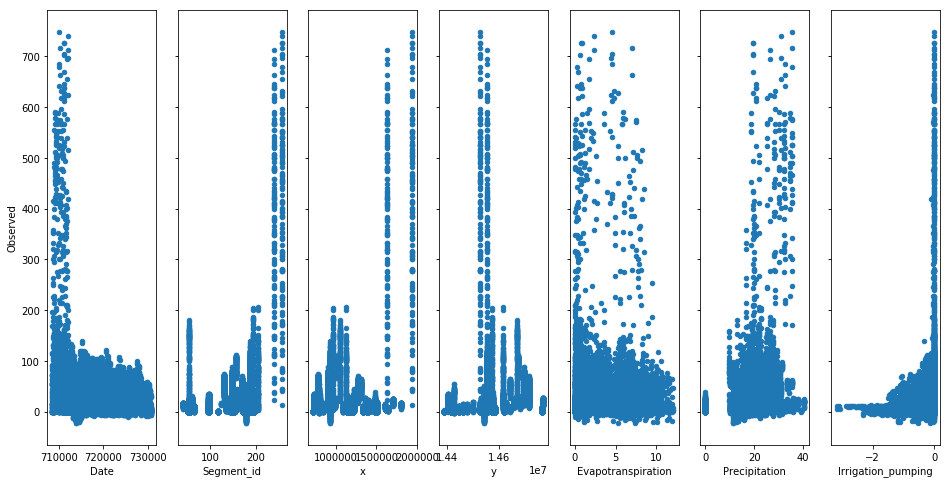

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, sharey=True)
data.plot(kind='scatter', x='Date', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Segment_id', y='Observed', ax=axs[1], figsize=(16, 8))
data.plot(kind='scatter', x='x', y='Observed', ax=axs[2])
data.plot(kind='scatter', x='y', y='Observed', ax=axs[3])
data.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[4])
data.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[5])
data.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[6])

In [16]:
# create X and y
feature_cols = ['Date', 'Segment_id', 'x','y','Evapotranspiration','Precipitation','Irrigation_pumping']
X = data[feature_cols]
y = data.Observed

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

1602.726914634389
[-1.64089850e-03  3.43820238e-01  4.96823821e-06 -3.23607985e-05
 -7.09876619e-01  1.73631515e+00  4.43141563e+00]


Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [19]:
X_new = data.iloc[:5,:-1]
display(X_new)
display(data.iloc[:5,:])

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping
0,710732,144,1086190,14476800,0.59,18.99,0.0
1,710763,144,1086190,14476800,0.97,29.63,0.0
2,710791,144,1086190,14476800,1.34,29.63,0.0
3,710822,144,1086190,14476800,1.79,29.63,0.0
4,710852,144,1086190,14476800,8.23,29.63,0.0


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [20]:
# use the model to make predictions on a new value
lm.predict(X_new.values)

array([55.46739567, 73.62116785, 73.31256834, 72.94225601, 68.32142363])

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those samplings** would fall inside the confidence interval.

**statsmodels** is a handy library to compute things like this.

In [63]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Observed ~ Date + Segment_id + x + y + Evapotranspiration + Precipitation + Irrigation_pumping', data=data).fit()

# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
display(lm.conf_int())

Intercept             1652.375295
Date                    -0.001609
Segment_id               0.350043
x                        0.000006
y                       -0.000038
Evapotranspiration      -0.483965
Precipitation            1.734190
Irrigation_pumping       5.963994
dtype: float64

,0,1
Intercept,1455.450720,1849.299869
Date,-0.001754,-0.001464
Segment_id,0.332803,0.367284
x,0.000003,0.000009
y,-0.000049,-0.000026
Evapotranspiration,-0.838456,-0.129475
Precipitation,1.635467,1.832913
Irrigation_pumping,2.190109,9.737878


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

We can plot confidence intervals using **Seaborn**. The confidence intervals are computed a little differently: the data is binned according to the independent variable and then a band containing 95% of the means of the bin is shown.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


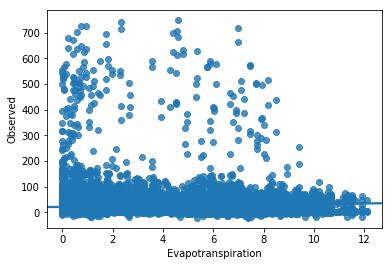

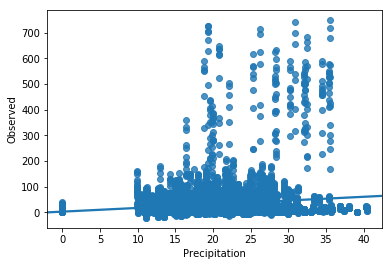

In [21]:
import seaborn as sns

plt.figure()
ax = sns.regplot(x='Evapotranspiration', y='Observed', data=data)

plt.figure()
ax = sns.regplot(x='Precipitation', y='Observed', data=data)


Note that the shaded region shows all possible regression curves within the 95% confidence interval

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [99]:
lm = smf.ols(formula='sales ~ TV', data=data).fit()
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

Note also that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## How Well Does the Model Fit the data? (R-squared)

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

$R^2 = 1 - \frac{\text{residual}}{\text{total variation}} = \frac{\sum_{i=1}^N (y_i-\hat{y}_i)^2}{\sum_{i=1}^N (y_i-\overline{y})^2}$

where $\overline{y}$ is the average value and $\hat{y}_i$ is the predicted value.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. This is a way of normalizing the raw residual. Here's an example of what R-squared "looks like":

<img src="08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [20]:
# Print the R-squared value for the model using statsmodels
lm = smf.ols(formula='sales ~ TV', data=data).fit()
display(lm.rsquared)

# Print the R-squared value for the model using sklearn
lm = LinearRegression()
lm.fit(data[['TV']], data.sales)
display(lm.score(data[['TV']], data.sales))

0.611875050850071

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use sklearn to estimate these coefficients:

In [14]:
# create X and y
feature_cols = ['Date', 'Segment_id', 'x','y','Evapotranspiration','Precipitation','Irrigation_pumping']
X = data[feature_cols]
y = data.Observed

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
display(lm.intercept_)
display(list(zip(feature_cols, lm.coef_)))


1602.726914634389

[('Date', -0.0016408985008362882),
 ('Segment_id', 0.3438202376937697),
 ('x', 4.968238209305363e-06),
 ('y', -3.2360798516160734e-05),
 ('Evapotranspiration', -0.7098766194415026),
 ('Precipitation', 1.736315145348328),
 ('Irrigation_pumping', 4.431415630520664)]

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output using statsmodels:

In [25]:
# create a fitted model with all three features
lm = smf.ols(formula='Observed ~ Date + Segment_id + x + y + Evapotranspiration + Precipitation + Irrigation_pumping', data=data).fit()

# print the coefficients
print('params:')
display(lm.params)
print()

print('pvalues:')
display(lm.pvalues)
print()

print('rsquared:')
display(lm.rsquared)
print()

# print a summary of the fitted model
lm.summary()

params:


Intercept             1602.726915
Date                    -0.001641
Segment_id               0.343820
x                        0.000005
y                       -0.000032
Evapotranspiration      -0.709877
Precipitation            1.736315
Irrigation_pumping       4.431416
dtype: float64


pvalues:


Intercept              5.802495e-71
Date                  1.236333e-134
Segment_id             0.000000e+00
x                      4.912426e-04
y                      9.603538e-10
Evapotranspiration     1.011407e-05
Precipitation          0.000000e+00
Irrigation_pumping     1.009044e-02
dtype: float64


rsquared:


0.2356121961555283

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     686.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:                -82863.
No. Observations:               15591   AIC:                         1.657e+05
Df Residuals:                   15583   BIC:                         1.658e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1602.7269     89.526     17.902      0.000    1427.246    1778.208
Date                  -0.0016   6.58e-05    -24.938      0.000      -0.002      -0.002
Segment_id             0.3438      0.008     44.019      0.000       0.329       0.359
x                   4.968e-06   1.43e-06      3.486      0.000    2.17e-06    7.76e-06
y                  -3.236e-05   5.29e-06     -6.120      0.000   -4.27e-05    -2.2e-05
Evapotranspiration    -0.7099      0.161     -4.416      0.000      -1.025      -0.395
Precipitation          1.7363      0.045     38.774      0.000       1.649       1.824
Irrigation_pumping     4.4314      1.722      2.573      0.010       1.056       7.807
==============================================================================
Omnibus:                    18011.647   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2092260.649
Skew:                           6.073   Prob(JB):                         0.00
Kurtosis:                      58.436   Cond. No.                     3.32e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [43]:
# only include TV and Radio in the model
lm = smf.ols(formula='Observed ~ Date', data=data).fit()
lm.rsquared

0.05476665414214921

In [44]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ Segment_id', data=data).fit()
lm.rsquared

0.11418908404291128

In [45]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ x', data=data).fit()
lm.rsquared

0.008031031037175618

In [46]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ y', data=data).fit()
lm.rsquared

0.010353299250547288

In [47]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ Evapotranspiration', data=data).fit()
lm.rsquared

0.00387479210956565

In [48]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ Precipitation', data=data).fit()
lm.rsquared

0.0729179957793552

In [49]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=data).fit()
lm.rsquared

0.002998304126610729

In [51]:
## Since R-squared is big, Segment_id, x, Precipitation, Date are the most predictive explanatory variables

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).